In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

In [39]:
#Load the Datasets
df = pd.read_csv("house_data.csv")

df.head()

House_ID  Area_sqft  Bedrooms  Bathrooms  Floors  Year_Built     City  \
0         1       4110         2          1       2        2017    Delhi   
1         2       2107         4          3       1        1980   Mumbai   
2         3       1484         2          2       3        1983  Chennai   
3         4       4176         3          1       2        2014    Delhi   
4         5       3880         4          3       1        2002  Kolkata   

          Price  
0  4.698696e+06  
1  3.899992e+06  
2  2.109576e+06  
3  5.450900e+06  
4  6.328658e+06

In [40]:
#Shape of the dataset.
df.shape

(2500, 8)

In [41]:
#Check the null values
df.isnull().sum()

House_ID      0
Area_sqft     0
Bedrooms      0
Bathrooms     0
Floors        0
Year_Built    0
City          0
Price         0
dtype: int64

In [42]:
#Describe the full dataset.
df.describe()

House_ID    Area_sqft     Bedrooms    Bathrooms      Floors  \
count  2500.00000  2500.000000  2500.000000  2500.000000  2500.00000   
mean   1250.50000  2775.152400     3.014000     2.475200     1.97640   
std     721.83216  1287.579146     1.410886     1.107193     0.82372   
min       1.00000   501.000000     1.000000     1.000000     1.00000   
25%     625.75000  1635.000000     2.000000     1.750000     1.00000   
50%    1250.50000  2844.000000     3.000000     2.000000     2.00000   
75%    1875.25000  3914.000000     4.000000     3.000000     3.00000   
max    2500.00000  4999.000000     5.000000     4.000000     3.00000   

        Year_Built         Price  
count  2500.000000  2.500000e+03  
mean   2000.832000  4.424360e+06  
std      12.254919  1.700973e+06  
min    1980.000000  8.619286e+05  
25%    1991.000000  2.985319e+06  
50%    2001.000000  4.418303e+06  
75%    2011.000000  5.737169e+06  
max    2022.000000  8.897461e+06

In [43]:
#Input and Output

fetures = ["Area_sqft","Bedrooms","Bathrooms","Floors","Year_Built"]

x = df[fetures]
y = df[["Price"]]

#Train Model 
model1 = LinearRegression()

model1.fit(x,y)
predicted_price = model1.predict(x)

In [44]:
#Velid Regression Matric

mae = mean_absolute_error(y,predicted_price)
mse = mean_squared_error(y,predicted_price)
rmse = np.sqrt(mse)
r2_score = r2_score(y,predicted_price)

print("Mean Absolute Error(MAE):",round(mae,2))
print("Mean Squared Error(MSE):",round(mse,2))
print("Root Mean Squared Error(RMSE):",round(rmse,2))
print("R^2 Score:",round(r2_score,2))

Mean Absolute Error(MAE): 346796.42
Mean Squared Error(MSE): 197117021679.42
Root Mean Squared Error(RMSE): 443978.63
R^2 Score: 0.93


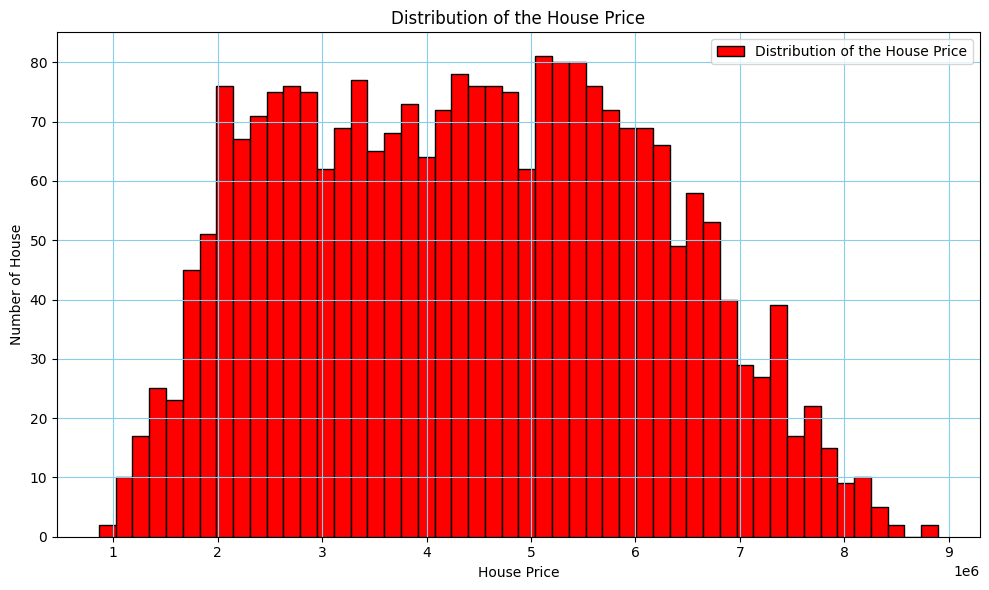

In [51]:
#Histogram Chart

plt.figure(figsize=(10,6))
plt.hist(df["Price"],bins=50,color="red",edgecolor="black",label="Distribution of the House Price")
plt.title("Distribution of the House Price")
plt.xlabel("House Price")
plt.ylabel("Number of House")
plt.grid(True,color="skyblue")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("Distribution_of_the_House_Price.png",dpi=400,bbox_inches='tight')
plt.show()

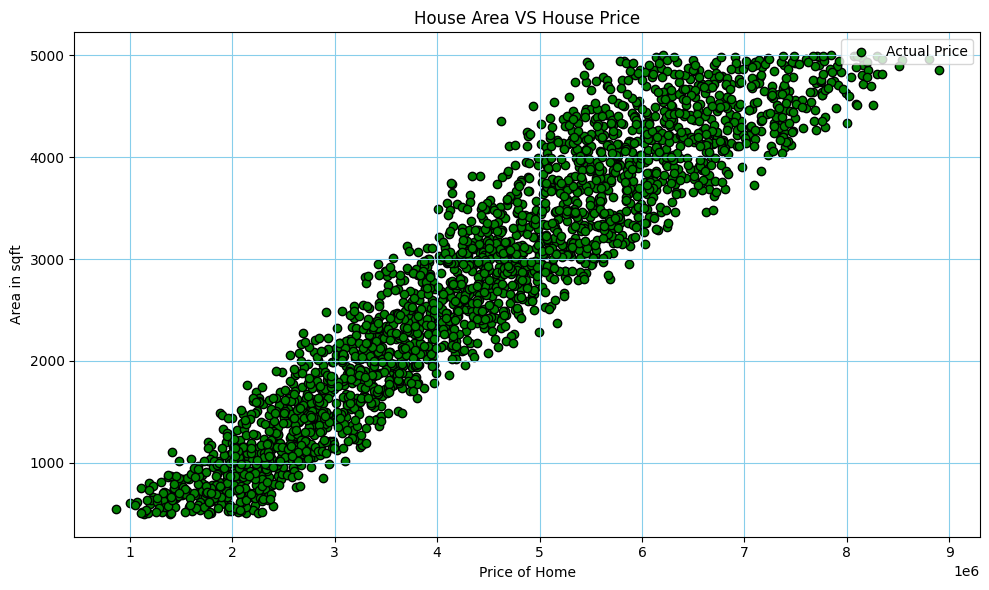

In [52]:
#Scatter + Regression Line

plt.figure(figsize=(10,6))
plt.scatter(df[["Price"]],df[["Area_sqft"]],color="green",edgecolor="black",label="Actual Price")
plt.title("House Area VS House Price")
plt.xlabel("Price of Home")
plt.ylabel("Area in sqft")
plt.grid(True,color="skyblue")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("House_Area_VS_House_Price.png",dpi=400,bbox_inches='tight')
plt.show()

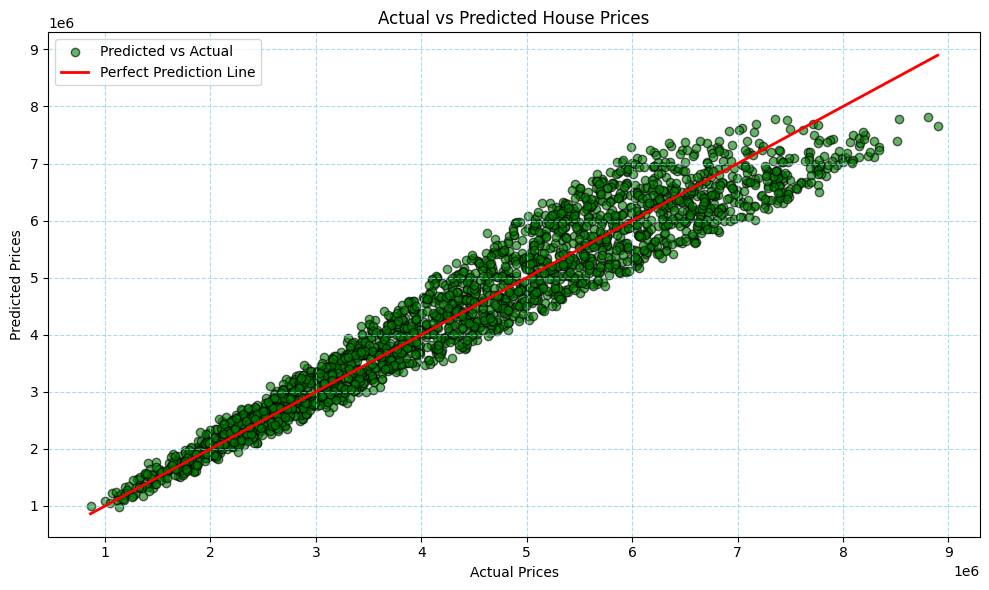

In [53]:
# Actual vs Predicted Prices Chart
plt.figure(figsize=(10,6))
plt.scatter(y, predicted_price, color="green", edgecolor="black", alpha=0.6, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="-", linewidth=2, label="Perfect Prediction Line")
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True, color="skyblue", linestyle="--", alpha=0.7)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Actual_vs_Predicted_House_Prices.png", dpi=400, bbox_inches="tight")
plt.show()

In [37]:
# Predict the Price of the house based on the area in sqft

x = df[["Area_sqft","Bedrooms","Bathrooms","Floors","Year_Built"]]
y = df[["Price"]]

#Train Model 
model1 = LinearRegression()

model1.fit(x,y)

Area_sqft = float(input("Enter the Area of the house(in sqft):"))
bedrooms = int(input("Enter the number of Bedrooms:"))
bathrooms = float(input("Enter the Bathroom:"))
floors = float(input("Enter the number of the floors:"))
year_built = int(input("Enter the build year of the House:"))

predicted_price = model1.predict([[Area_sqft,bedrooms,bathrooms,floors,year_built]])

print(f"Area of House is {Area_sqft} and bedrooms is {bedrooms} and bathrooms is {bathrooms} in the {floors} floor and the build year is {year_built} so accordingly this all the infotmation the predicted price of the house is {predicted_price[0][0]:,.2f}.")

Enter the Area of the house(in sqft): 12
Enter the number of Bedrooms: 54
Enter the Bathroom: 545
Enter the number of the floors: 5
Enter the build year of the House: 6


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
